[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal distributiion')]

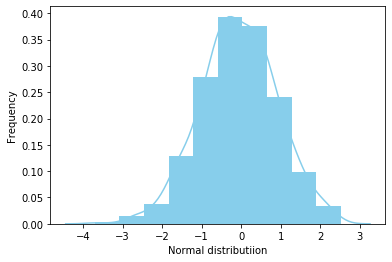

In [22]:
#Distribusi Normal

#memanggil pustaka
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

data_normal = norm.rvs(size=1000,loc=0,scale=1)

ax = sns.distplot(data_normal,
                bins=10,kde=True,
                color='skyblue',
                hist_kws={"linewidth":15, 'alpha':1})

ax.set(xlabel='Normal distributiion', ylabel='Frequency')

In [3]:
import pandas as pd

data_cov = pd.read_csv("Covid-19_province.csv")
data_cov[-5:]

,Type,Features Type,ID-number,Province_code,Province_name,Confirmed_cases,Recovered_cases,Death_cases,Features Geometry Type,Features Geometry Coordinates
29,FeatureCollection,Feature,30,76,Sulawesi Barat,1036,841,14,Point,"119.34347138300006,-2.461902014999964"
30,FeatureCollection,Feature,31,81,Maluku,3863,3266,47,Point,"129.360425,-3.126119342999971"
31,FeatureCollection,Feature,32,82,Maluku Utara,2232,1946,75,Point,"128.01592944200002,0.869337001000019"
32,FeatureCollection,Feature,33,94,Papua,9037,4637,129,Point,"140.0000000000001,-5"
33,FeatureCollection,Feature,34,91,Papua Barat,4189,3655,66,Point,"132.9683417120001,-2.041723281999964"


In [64]:
#data_cov = data_cov.drop(columns=['Type','Features Type','ID-number'])
data_cov[:15]

,Province_code,Province_name,Confirmed_cases,Recovered_cases,Death_cases,Features Geometry Type,Features Geometry Coordinates
0,11,Aceh,7797,6258,282,Point,"96.90952274800009,4.225081892000048"
1,12,Sumatera Utara,13277,10846,542,Point,"99.05788784900005,2.184779215000049"
2,13,Sumatera Barat,16709,13386,311,Point,"100.46680503000005,-0.85191434799998"
3,14,Riau,14841,11490,340,Point,"101.81289195400007,0.510525849000032"
4,15,Jambi,1399,892,27,Point,"103.59932,-1.61775"
5,16,Sumatera Selatan,8534,6954,461,Point,"104.17041944500005,-3.213346821999949"
6,17,Bengkulu,1294,992,59,Point,"102.26312,-3.79116"
7,19,Kepulauan Bangka Belitung,777,589,10,Point,"105.98694808200008,-2.252956410999957"
8,18,Lampung,1884,1120,78,Point,"105.01831305100006,-4.918073086999925"
9,21,Kepulauan Riau,4640,3074,116,Point,"108.20222888900008,3.915947241000026"


In [5]:
import numpy as np

conf_case = np.array(data_cov['Confirmed_cases'])
reco_case = np.array(data_cov['Recovered_cases'])
prov_name = np.array(data_cov['Province_name'])

print(conf_case[:5]) 
print(reco_case[:5])
print(prov_name[:5])

[ 7797 13277 16709 14841  1399]
[ 6258 10846 13386 11490   892]
['Aceh' 'Sumatera Utara' 'Sumatera Barat' 'Riau' 'Jambi']


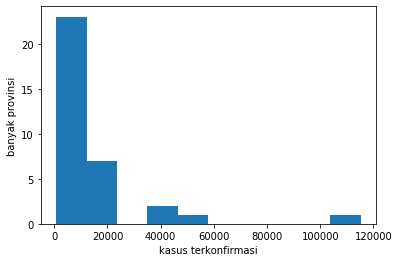

In [7]:
dir_python = "/home/not/Project/Python/Gambar/"

conf_fig = plt.figure()
conf_vis = plt.hist(conf_case)
plt.ylabel("banyak provinsi")
plt.xlabel("kasus terkonfirmasi")
plt.show()
conf_fig.savefig(dir_python+'conf_cases.png')

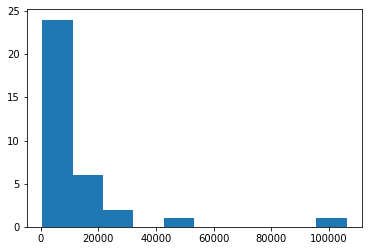

In [8]:
reco_fig = plt.figure()
reco_vis = plt.hist(reco_case)
plt.show()
reco_fig.savefig('reco_cases.png')

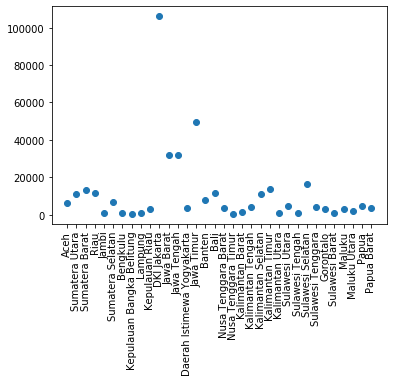

In [9]:
cov_fig = plt.figure()
plt.scatter(prov_name,reco_case)
plt.xticks(rotation=90)
plt.show
cov_fig.savefig('covid_per_provinsi.png')

In [6]:
parameter_covid = np.array(data_cov[['Confirmed_cases',
                                     'Recovered_cases',
                                     'Death_cases']])

parameter_covid[:5]

pair.plot([1,2,3])

conf_fig = plt.subplot()
conf_vis = plt.hist(conf_case)
plt.ylabel("banyak provinsi")
plt.xlabel("kasus terkonfirmasi")

reco_fig = plt.figure()
reco_vis = plt.hist(reco_case)

cov_fig = plt.figure()
plt.scatter(prov_name,reco_case)
plt.xticks(rotation=90)

array([[ 7797,  6258,   282],
       [13277, 10846,   542],
       [16709, 13386,   311],
       [14841, 11490,   340],
       [ 1399,   892,    27]])

In [56]:
parameter_covid = np.array(data_cov[['Confirmed_cases',
                                     'Recovered_cases',
                                     'Death_cases']])

pd.coeff(parameter_covid[:,0],parameter_covid[:,2])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

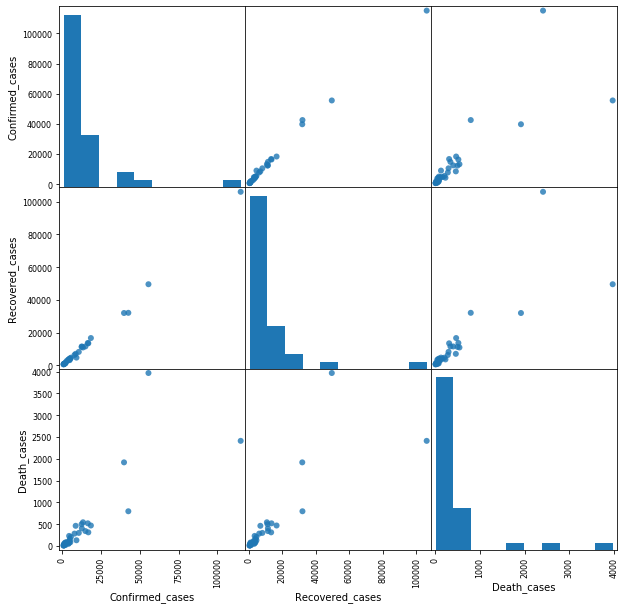

In [18]:
pair = pd.plotting.scatter_matrix(data_cov[['Confirmed_cases',
                                     'Recovered_cases',
                                     'Death_cases']], figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, alpha = 0.8)


In [42]:
!pip install mime
data_cov_prov = data_cov[['Confirmed_cases','Recovered_cases','Death_cases']]

    100% |████████████████████████████████| 829kB 532kB/s ta 0:00:01
  Running setup.py bdist_wheel for mime ... done
  Stored in directory: /home/not/.cache/pip/wheels/18/fa/95/b3b92f350c8df57becba1faad2ef598cfbeb56188570e6ab8e
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/not/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built mime future


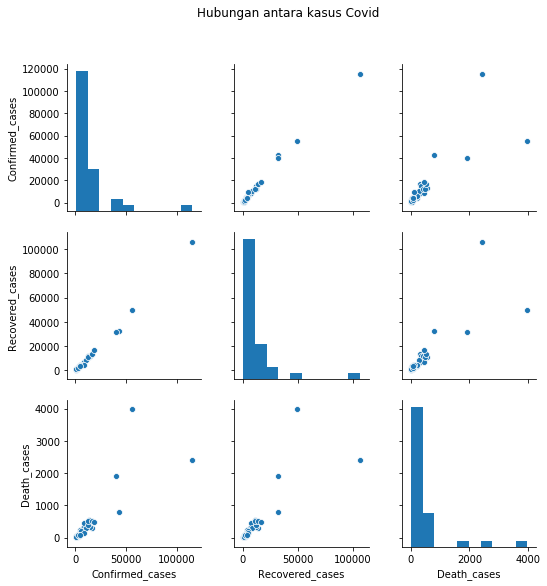

In [25]:
import seaborn as sns
pair_cov = sns.pairplot(data_cov_prov)
pair_cov.fig.suptitle("Hubungan antara kasus Covid", y=1.08)
pair_cov.savefig("pair_covid.png")

In [41]:
counter = 1

In [39]:
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage

str_dari = 'contoh_dari@gmail.com'
str_kepada = 'contoh_kepada@gmail.com'

#membangun isi pada halaman surel
msg_root = MIMEMultipart('related')
msg_root['Subject'] = 'Pair covid visualization'
msg_root['From'] = str_dari
msg_root['To'] = str_kepada
msg_root.preamble = 'This is a multi-part message in MIME format.'

msg_alternative = MIMEMultipart('alternative')
msg_root.attach(msg_alternative)

msg_text = MIMEText('Sebuah pesan alternatif')
msg_alternative.attach(msg_text)

msg_html = """
    <h1> Pengantar</h1>
    </br>
    <p> Disini saya lampirkan sebuah surat berisi tentang</p>
    </br>
    <img src="cid:image1">
"""

msg_text = MIMEText(msg_html,'html')
msg_alternative.attach(msg_text)

#memuat gambar
fp = open('pair_covid.png', 'rb')
msg_gambar = MIMEImage(fp.read())
fp.close()

# Mendefiniskan ID gambar
msg_gambar.add_header('Content-ID', '<image1>')
msg_root.attach(msg_gambar)

# mengirim email menggunakan smtplib
import smtplib
import sys

provider = 'smtp.gmail.com'
email_pengguna = 'contoh@gmail.com'
pass_pengguna = secret_email.env.password

try:
    if(counter<100):
        smtp = smtplib.SMTP_SSL(provider, 465)
        smtp.ehlo()
        smtp.login(email_pengguna, pass_pengguna)
        #mengirim email dengan komponen yang telah dibuat dengan MIME
        smtp.sendmail(str_dari, str_kepada, msg_root.as_string())
        smtp.quit()
        counter+=1
        print('Email Terkirim')
    else:
        print('maaf telah melebihi kuota, silahkan menghubungi +62123')
except:
    e = sys.exc_info()[1]
    print("Terjadi masalah : %s" %e)

masukan password anda: sas


maaf telah melebihi kuota, silahkan menghubungi +62123


In [40]:
counter

100